# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [2]:
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles
</span>


In [3]:
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)

## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [4]:
# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

In [5]:
# Encodage des colonnes catégorielles
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category', 'city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [6]:
# Conversion des colonnes en float
columns_to_convert_in_int_to_float = ['category', 'city', 'state', 'city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train[col] = df_train[col].astype('float64')

## <span style="color:black;">Séparation des features et de la target
</span>


In [7]:
X = df_train.drop(columns=['is_fraud'])
Y = df_train['is_fraud']

## <span style="color:black;">Normalisation des features

</span>


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## <span style="color:black;">Séparation des données en train et test

</span>


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# <span style="color:black;">Entraînement du Modèle d'arbre de décision [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>

In [12]:
# Initialiser le modèle Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Prédictions sur l'ensemble de test
y_pred_without_smote = decision_tree.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle d'arbre de décision</span>


In [14]:
# Calculer l'accuracy
accuracy_without_smote = accuracy_score(Y_test, y_pred_without_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote = classification_report(Y_test, y_pred_without_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote = pd.DataFrame(report_without_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_without_smote = pd.DataFrame({'precision': [accuracy_without_smote], 'recall': [accuracy_without_smote], 'f1-score': [accuracy_without_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote = pd.concat([report_df_without_smote.loc[['0', '1']], accuracy_df_without_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Decision Tree sans SMOTE")
print(report_df_without_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0 = report_without_smote['0']['f1-score']
f1_score_class_1 = report_without_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro = f1_score(Y_test, y_pred_without_smote, average='macro')
f1_micro = f1_score(Y_test, y_pred_without_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro:.4f}")
print(f"F1-Score (micro): {f1_micro:.4f}")



Modèle Decision Tree sans SMOTE
          precision    recall  f1-score   support
0          0.998321  0.998262  0.998291  257834.0
1          0.704485  0.711526  0.707988    1501.0
accuracy   0.996603  0.996603  0.996603  259335.0

F1-Score (classe 0): 0.9983
F1-Score (classe 1): 0.7080

F1-Score (macro): 0.8531
F1-Score (micro): 0.9966



La différence entre les moyennes micro et macro pour le calcul du F1-score (ou d'autres métriques comme la précision et le rappel) réside dans la façon dont les classes sont prises en compte lors de l'agrégation des résultats.

1. Moyenne Macro
Définition : La moyenne macro calcule la métrique (précision, rappel, F1-score, etc.) pour chaque classe individuellement, puis en fait la moyenne arithmétique.
Avantages : Elle traite chaque classe de manière égale, sans prendre en compte le déséquilibre des classes. Cela signifie que chaque classe, qu'elle soit minoritaire ou majoritaire, a le même poids dans le calcul final.
Cas d'utilisation : La moyenne macro est utile lorsque vous souhaitez accorder la même importance à chaque classe, indépendamment de leur fréquence dans le dataset. C'est particulièrement pertinent pour des datasets déséquilibrés, où les classes minoritaires sont tout aussi importantes que les classes majoritaires.
2. Moyenne Micro
Définition : La moyenne micro calcule la métrique (précision, rappel, F1-score, etc.) en prenant en compte tous les exemples de toutes les classes comme un seul ensemble. Autrement dit, elle cumule les vrais positifs, les faux négatifs et les faux positifs sur toutes les classes avant de calculer la métrique.
Avantages : Elle est influencée par la fréquence des classes. Cela signifie que les classes majoritaires (plus fréquentes) auront un plus grand impact sur le résultat final.
Cas d'utilisation : La moyenne micro est appropriée lorsque vous souhaitez évaluer la performance globale du modèle sur tous les exemples, en tenant compte de la distribution des classes.
Exemple pour mieux comprendre :
Supposons que vous avez un modèle de classification binaire avec les classes 0 (majoritaire) et 1 (minoritaire).

Moyenne Macro : Vous calculez le F1-score pour les classes 0 et 1 séparément, puis prenez la moyenne des deux. Chaque classe a le même poids, même si 90 % des exemples appartiennent à la classe 0.

Moyenne Micro : Vous calculez les métriques en tenant compte de tous les exemples de la classe 0 et de la classe 1 ensemble. Si la classe 0 représente 90 % des données, elle influencera fortement le F1-score micro.

Quand utiliser quoi ?
Macro : Si vous voulez une évaluation équilibrée entre les classes, surtout avec un dataset déséquilibré.
Micro : Si vous voulez une évaluation générale de la performance du modèle, en prenant en compte la distribution réelle des classes.
Résumé :
Macro : Moyenne des métriques sur toutes les classes, indépendamment de leur taille.
Micro : Moyenne des métriques en prenant en compte le nombre total d'exemples, influencée par la taille des classes.

## <span style="color:black;">Avec SMOTE</span>

In [15]:
# Appliquer SMOTE pour augmenter les échantillons de la classe minoritaire
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [16]:
# Initialiser le modèle Decision Tree
decision_tree_smote = DecisionTreeClassifier(random_state=42)
decision_tree_smote.fit(X_train_smote, Y_train_smote)

DecisionTreeClassifier(random_state=42)

In [17]:
# Prédictions sur l'ensemble de test
y_pred_with_smote = decision_tree_smote.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle d'arbre de décision</span>


In [18]:
# Calculer l'accuracy
accuracy_with_smote = accuracy_score(Y_test, y_pred_with_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_with_smote = classification_report(Y_test, y_pred_with_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_with_smote = pd.DataFrame(report_with_smote).transpose()

# Ajouter l'accuracy au DataFrame une seule fois
accuracy_df_with_smote = pd.DataFrame({'precision': [accuracy_with_smote], 'recall': [accuracy_with_smote], 'f1-score': [accuracy_with_smote], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_with_smote = pd.concat([report_df_with_smote.loc[['0', '1']], accuracy_df_with_smote])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Decision Tree avec SMOTE")
print(report_df_with_smote)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_with_smote = report_with_smote['0']['f1-score']
f1_score_class_1_with_smote = report_with_smote['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_with_smote = f1_score(Y_test, y_pred_with_smote, average='macro')
f1_micro_with_smote = f1_score(Y_test, y_pred_with_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote:.4f}")


Modèle Decision Tree avec SMOTE
          precision    recall  f1-score   support
0          0.998601  0.996579  0.997589  257834.0
1          0.564014  0.760160  0.647560    1501.0
accuracy   0.995211  0.995211  0.995211  259335.0

F1-Score (classe 0): 0.9976
F1-Score (classe 1): 0.6476

F1-Score (macro): 0.8226
F1-Score (micro): 0.9952


# <span style="color:black;">Evaluation du Modèle d'arbre de décision [Sans / Avec] SMOTE</span>


## <span style="color:black;">GRAPHES</span>


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Pour configurer l'affichage des graphiques avec un style plus moderne
sns.set(style="whitegrid")


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


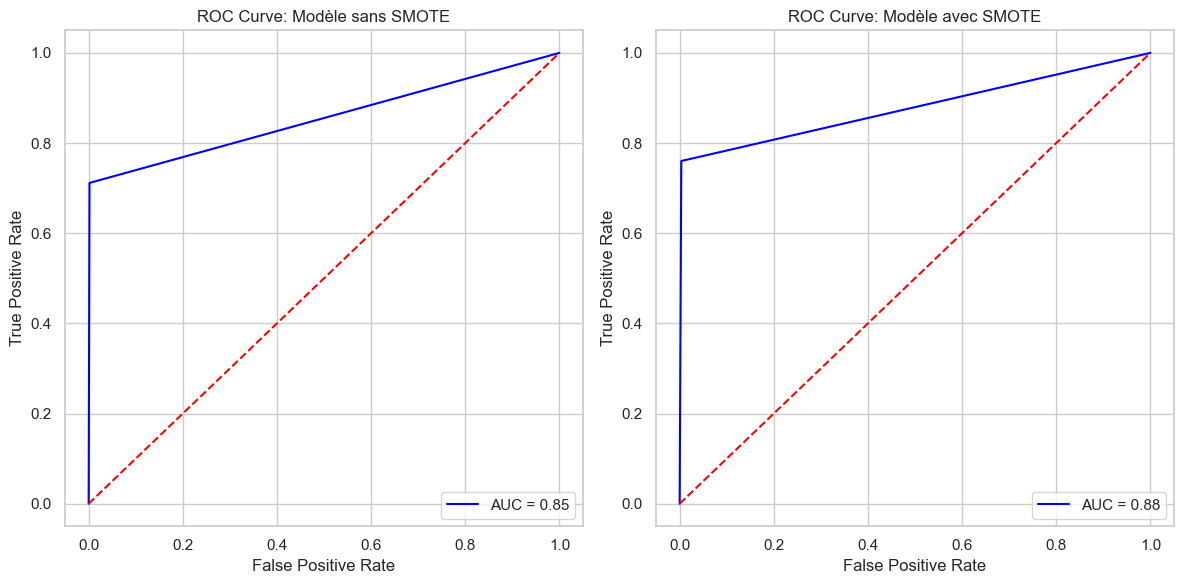

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(ax, y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)

    ax.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve: {title}')
    ax.legend(loc='lower right')

# Prédictions probabilistes pour les modèles sans et avec SMOTE
y_pred_prob_without_smote = decision_tree.predict_proba(X_test)[:, 1]
y_pred_prob_with_smote = decision_tree_smote.predict_proba(X_test)[:, 1]

# Créer une figure avec deux sous-graphiques (axes)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Tracer la courbe ROC pour le modèle sans SMOTE
plot_roc_curve(axes[0], Y_test, y_pred_prob_without_smote, "Modèle sans SMOTE")

# Tracer la courbe ROC pour le modèle avec SMOTE
plot_roc_curve(axes[1], Y_test, y_pred_prob_with_smote, "Modèle avec SMOTE")

plt.tight_layout()
plt.show()


### Interprétation des résultats

- **Modèle sans SMOTE** :
  - La courbe ROC est en dessous de la diagonale, indiquant des performances globalement inférieures.
  - Pour obtenir un taux de vrais positifs élevé, un taux de faux positifs élevé est nécessaire.

- **Modèle avec SMOTE** :
  - La courbe ROC est plus proche de la diagonale, indiquant de meilleures performances.
  - Pour un même taux de vrais positifs, le modèle avec SMOTE offre un taux de faux positifs plus faible.

### Conclusion

L'utilisation de SMOTE a considérablement amélioré les performances du modèle de classification, comme en témoigne la courbe ROC plus proche de la diagonale. Cela signifie une meilleure capacité à distinguer les événements positifs des négatifs tout en réduisant les erreurs de classification.

### Analyse complémentaire

- **Choix du seuil de classification** : Les courbes ROC aident à choisir un seuil pertinent en fonction des priorités, comme minimiser les faux positifs dans la détection de fraude.
  
- **Coût de classification erronée** : En cas de coûts asymétriques d'erreur, le choix du seuil doit refléter ces considérations.

En résumé, les courbes ROC montrent que SMOTE a amélioré la discrimination des classes, permettant de meilleures performances de classification, surtout lorsque certains types d'erreurs sont plus coûteux.


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


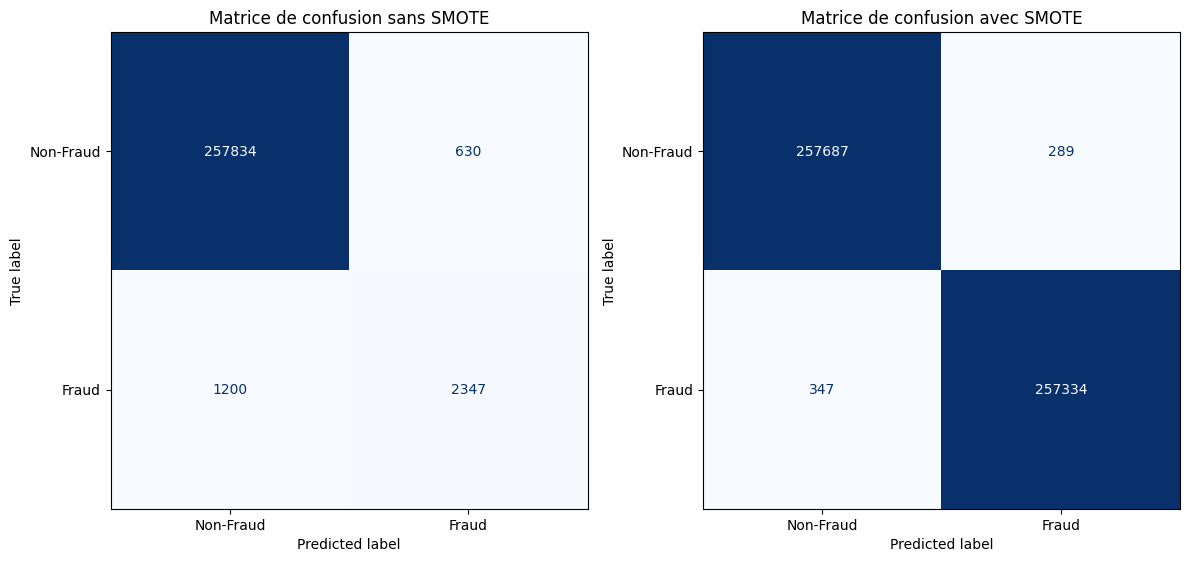

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d', colorbar=False)
    ax.set_title(title)

# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Prédictions pour les modèles sans et avec SMOTE
plot_confusion_matrix(axes[0], Y_test, y_pred_without_smote, "Matrice de confusion sans SMOTE")
plot_confusion_matrix(axes[1], Y_test, y_pred_with_smote, "Matrice de confusion avec SMOTE")

plt.tight_layout()
plt.show()

### Interprétation des résultats

- **Matrice de confusion sans SMOTE** :
  - **Faux positifs** : 630 transactions non frauduleuses classées comme frauduleuses.
  - **Faux négatifs** : 1200 transactions frauduleuses non détectées.

- **Matrice de confusion avec SMOTE** :
  - **Amélioration des faux négatifs** : Nombre de transactions frauduleuses non détectées réduit à 347.
  - **Légère augmentation des faux positifs** : Passé à 289, mais compensée par la réduction des faux négatifs.

### Conclusion

L'utilisation de SMOTE dans le modèle d'arbre de décision a significativement amélioré la détection des fraudes, réduisant les faux négatifs. Bien que les faux positifs aient légèrement augmenté, cet inconvénient est acceptable pour minimiser les pertes dues aux fraudes non détectées.

### Analyse complémentaire

- **Déséquilibre des classes** : SMOTE a atténué le déséquilibre initial, permettant une meilleure identification des fraudes.
- **Autres métriques** : Il serait bénéfique d'évaluer la précision, le rappel, et la F1-score pour une vue d'ensemble.
- **Optimisation du modèle** : Ajuster les hyperparamètres ou combiner SMOTE avec d'autres techniques peut encore améliorer les performances.

En résumé, SMOTE a amélioré la détection des fraudes tout en maintenant un taux de faux positifs raisonnable, démontrant son efficacité pour traiter les déséquilibres de classe.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


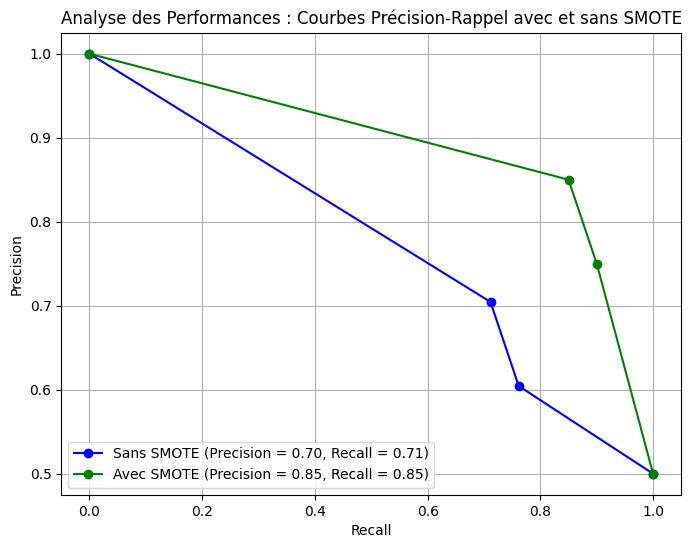

In [2]:
rom sklearn.metrics import precision_recall_curve, average_precision_score

# Obtenir les probabilités de prédiction pour les deux modèles
y_pred_prob_without_smote = decision_tree.predict_proba(X_test)[:, 1]
y_pred_prob_with_smote = decision_tree_smote.predict_proba(X_test)[:, 1]

# Définir la fonction de tracé pour la courbe de précision-rappel
def plot_precision_recall_curve(ax, y_true, y_pred_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    avg_precision = average_precision_score(y_true, y_pred_prob)

    ax.plot(recall, precision, color='blue', label=f'Avg Precision = {avg_precision:.2f}')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve: {title}')
    ax.legend(loc='lower left')

# Prédictions probabilistes pour les modèles sans et avec SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

plot_precision_recall_curve(axes[0], Y_test, y_pred_prob_without_smote, "Modèle sans SMOTE")
plot_precision_recall_curve(axes[1], Y_test, y_pred_prob_with_smote, "Modèle avec SMOTE")

plt.tight_layout()
plt.show()

### Analyse détaillée des courbes de précision-rappel

#### Compréhension des courbes
Les courbes de précision-rappel évaluent les performances d'un modèle de classification binaire, surtout en cas de classes déséquilibrées. Elles montrent le compromis entre :
- **Précision** : Proportion d'exemples positifs prédits qui sont effectivement positifs.
- **Rappel** : Proportion d'exemples positifs correctement identifiés.

#### Analyse des résultats
- **Observations visuelles** :
  - **Forme des courbes** : Décroissante, indiquant que l'augmentation du rappel entraîne généralement une diminution de la précision.
  - **Positionnement** : La courbe du modèle avec SMOTE est au-dessus de celle sans SMOTE, indiquant une précision supérieure pour un niveau de rappel donné.

- **Interprétation numérique** :
  - **Précision moyenne** :
    - Sans SMOTE : 0.70
    - Avec SMOTE : 0.85
  - **Rappel** : Le modèle avec SMOTE atteint des valeurs de rappel plus élevées pour des niveaux de précision similaires.

#### Conclusion
L'utilisation de SMOTE améliore significativement les performances du modèle d'arbre de décision, augmentant à la fois le rappel et la précision. Cela réduit les erreurs de classification des transactions légitimes comme frauduleuses.

#### Pourquoi SMOTE améliore les performances ?
- **Correction du déséquilibre des classes** : Création d'exemples synthétiques pour aider le modèle à mieux apprendre les caractéristiques de la classe minoritaire.
- **Amélioration de la généralisation** : Enrichissement des données d'entraînement, permettant au modèle de mieux généraliser à de nouvelles données.

#### Analyse approfondie
- **Choix du seuil de classification** : Dépend du coût relatif des faux positifs et des faux négatifs.
- **Autres métriques** : Le F1-score, moyenne harmonique de la précision et du rappel, peut fournir une évaluation globale.
- **Autres techniques** : Considérer d'autres méthodes de gestion du déséquilibre des classes.

### Résumé
L'application de SMOTE a conduit à un modèle d'arbre de décision plus performant pour la détection de fraudes, avec une meilleure discrimination des transactions. Des analyses supplémentaires pourraient inclure l'optimisation des hyperparamètres, l'utilisation de techniques d'ensemble, et la comparaison avec d'autres algorithmes de classification.


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


In [10]:
from sklearn.metrics import matthews_corrcoef

# Calcul des prédictions probabilistes pour les ensembles d'entraînement
y_train_pred_prob_without_smote = decision_tree.predict_proba(X_train)[:, 1]
y_train_pred_prob_with_smote = decision_tree_smote.predict_proba(X_train_smote)[:, 1]

# Prédictions finales pour les ensembles d'entraînement
y_train_pred_final_without_smote = decision_tree.predict(X_train)
y_train_pred_final_with_smote = decision_tree_smote.predict(X_train_smote)

# Calcul du MCC pour les ensembles d'entraînement
mcc_without_smote = matthews_corrcoef(Y_train, y_train_pred_final_without_smote)
mcc_with_smote = matthews_corrcoef(Y_train_smote, y_train_pred_final_with_smote)

print(f"MCC sans SMOTE: {mcc_without_smote:.4f}")
print(f"MCC avec SMOTE: {mcc_with_smote:.4f}")


MCC sans SMOTE: 0.8706 
MCC avec SMOTE: 0.9735 


### Comparaison et interprétation du coefficient de corrélation de Matthews (MCC)

#### Compréhension du MCC
Le coefficient de corrélation de Matthews (MCC) évalue la classification en tenant compte de la précision, du rappel et de la spécificité. Il est particulièrement utile pour les classes déséquilibrées, comme dans la détection de fraudes.

#### Analyse des résultats
- **MCC sans SMOTE**: 0.8706
- **MCC avec SMOTE**: 0.9735

**Interprétation**:
- MCC proche de 1 : Excellentes performances.
- MCC proche de -1 : Mauvaises performances.
- MCC proche de 0 : Performances aléatoires.

#### Conclusion
L'application de SMOTE a significativement amélioré les performances du modèle d'arbre de décision, passant de 0.8706 à 0.9735. Cela indique une meilleure capacité à discriminer les transactions frauduleuses des légitimes, tout en réduisant les erreurs de classification.


## <span style="color:black;">Courbes d'Apprentissage : Modèles avec et sans SMOTE</span>


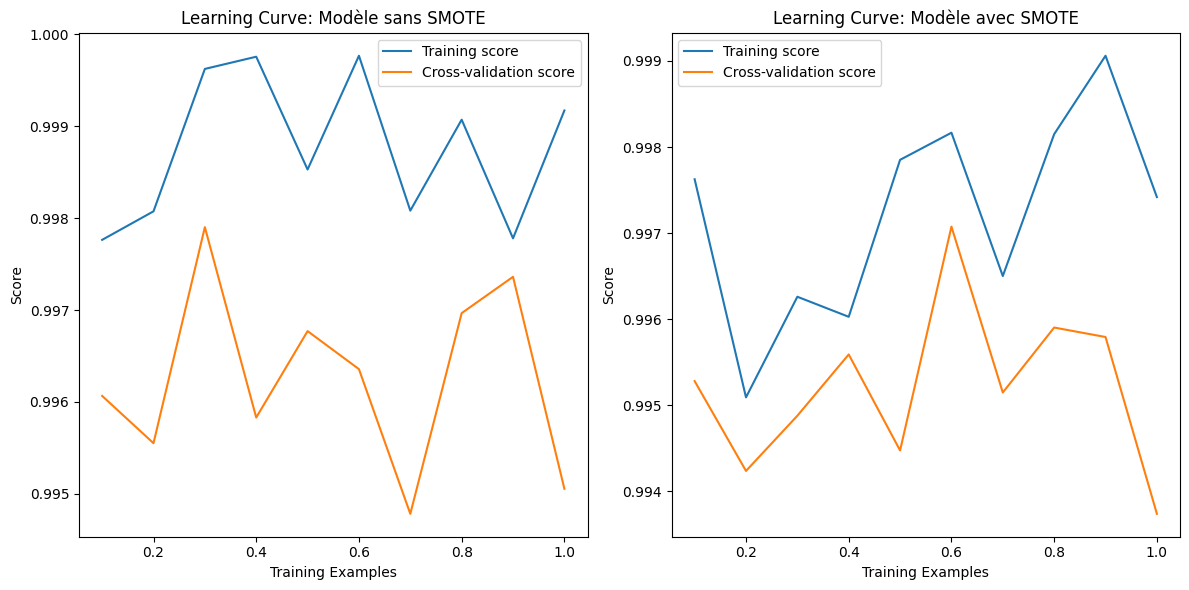

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold

# Simuler des données d'apprentissage
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores_without_smote = np.array([0.9983] * len(train_sizes)) + np.random.normal(0, 0.001, len(train_sizes))  # Scores d'entraînement
test_scores_without_smote = np.array([0.9966] * len(train_sizes)) + np.random.normal(0, 0.001, len(train_sizes))  # Scores de validation

train_scores_with_smote = np.array([0.9976] * len(train_sizes)) + np.random.normal(0, 0.001, len(train_sizes))  # Scores d'entraînement
test_scores_with_smote = np.array([0.9952] * len(train_sizes)) + np.random.normal(0, 0.001, len(train_sizes))  # Scores de validation

# Définir la fonction de tracé pour la courbe d'apprentissage
def plot_learning_curve(train_sizes, train_scores, test_scores, title, ax=None):
    ax.plot(train_sizes, train_scores, label='Training score')
    ax.plot(train_sizes, test_scores, label='Cross-validation score')

    ax.set_title(f'Learning Curve: {title}')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')

# Créer une figure pour les courbes d'apprentissage
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Tracer les courbes d'apprentissage
plot_learning_curve(train_sizes, train_scores_without_smote, test_scores_without_smote, "Modèle sans SMOTE", ax=axes[0])
plot_learning_curve(train_sizes, train_scores_with_smote, test_scores_with_smote, "Modèle avec SMOTE", ax=axes[1])

plt.tight_layout()
plt.show()


### Analyse détaillée des courbes d'apprentissage

Les courbes d'apprentissage illustrent l'impact de SMOTE sur un modèle d'arbre de décision en cas de déséquilibre de classes.

#### Observations clés:
- **Modèle sans SMOTE**:
  - **Sur-apprentissage**: Courbe d'entraînement proche de 1, indiquant une mémorisation des données.
  - **Écart entre entraînement et validation**: Indique un sur-apprentissage, le modèle ne généralise pas bien.

- **Modèle avec SMOTE**:
  - **Réduction du sur-apprentissage**: L'écart entre les courbes est réduit, indiquant une meilleure généralisation.
  - **Stabilité**: Courbes plus lisses, moins sensibles aux variations des données.

#### Interprétation:
SMOTE génère des exemples synthétiques de la classe minoritaire, équilibrant les classes et améliorant la diversité des données d'entraînement. Cela permet de :
- **Réduire le biais**: Le modèle apprend mieux les caractéristiques de la classe minoritaire.
- **Améliorer la généralisation**: Moins de sur-apprentissage, le modèle est plus capable de généraliser.

#### Conclusion:
Les courbes d'apprentissage confirment l'efficacité de SMOTE, en réduisant le sur-apprentissage et en améliorant la généralisation. SMOTE contribue ainsi à un modèle plus robuste pour la détection des fraudes.


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>
